<br>

# Modelos de Árvores e Ensembles

<br>

Neste módulos, iremos discutir em detalhes modelos baseados em árvores, as conhecidas __árvores de decisão.__ Além disso, discutiremos __modelos ensemble__, que são __agrupamentos__ de modelos -no nosso caso específico, trataremos de __agrupamentos de árvores__ -e estão dentre os modelos mais potentes em machine learning.

Esses modelos podem ser usados tanto para regressão quanto classificação.

<br>

## Introdução as árvores de decisão

<br>

Vamos analisar os dados:

O dataset que iremos trabalhar nesse início é o __iris__, muito conhecido no contexto de machine learning.

Cada linha do __iris__ corresponde a uma flor, e temos informações da mesma:

1- sepal length: comprimento da sépala da flor;

2- sepal width_ largura da sépala da flor;

3- petal length: comprimento da pétala da flor;

4- petal width_ largura da pétala da flor;



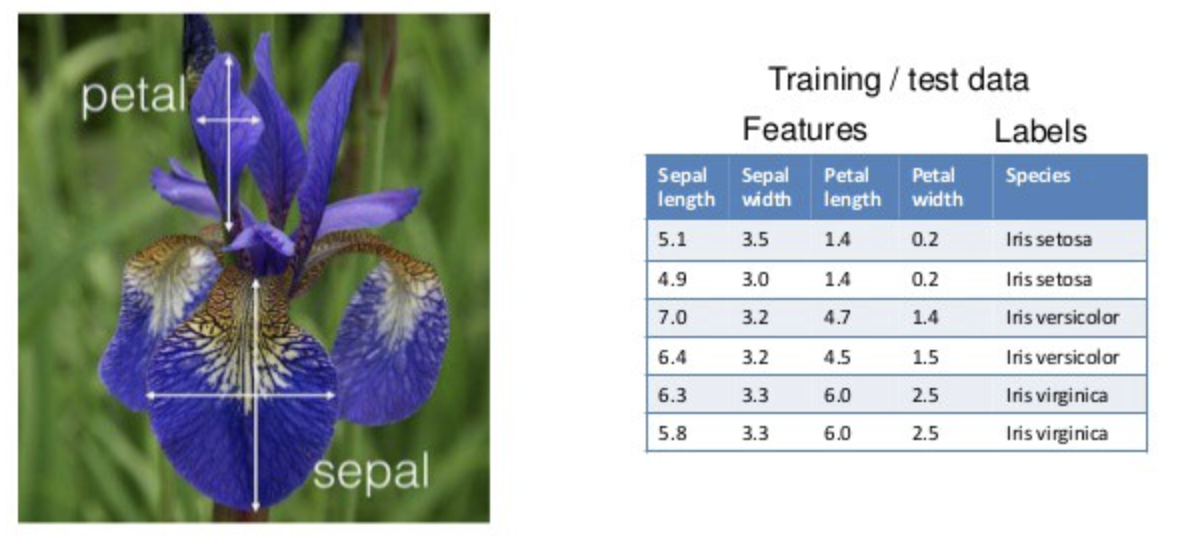

<br>

Na sequência, vamos começar trabalhando apenas com as duas últimas variáveis: petal length e width.
    
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#carregando um dataset para estudo de caso

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

df = pd.DataFrame(np.c_[X, y], columns = iris.feature_names[2:] + ['flower'])
df['flower_name'] = df.flower.map({0:"setosa", 1:"versicolor", 2:"virginica"})
df.sample(20)

petal length (cm)  petal width (cm)  flower flower_name
128                5.6               2.1     2.0   virginica
97                 4.3               1.3     1.0  versicolor
62                 4.0               1.0     1.0  versicolor
43                 1.6               0.6     0.0      setosa
5                  1.7               0.4     0.0      setosa
80                 3.8               1.1     1.0  versicolor
140                5.6               2.4     2.0   virginica
78                 4.5               1.5     1.0  versicolor
61                 4.2               1.5     1.0  versicolor
76                 4.8               1.4     1.0  versicolor
96                 4.2               1.3     1.0  versicolor
139                5.4               2.1     2.0   virginica
124                5.7               2.1     2.0   virginica
103                5.6               1.8     2.0   virginica
31                 1.5               0.4     0.0      setosa
135                6.1               2.3     2.0   virginica
75                 4.4               1.4     1.0  versicolor
49                 1.4               0.2     0.0      setosa
9                  1.5               0.1     0.0      setosa
132                5.6               2.2     2.0   virginica

In [4]:
df.groupby("flower_name").mean()

petal length (cm)  petal width (cm)  flower
flower_name                                             
setosa                   1.462             0.246     0.0
versicolor               4.260             1.326     1.0
virginica                5.552             2.026     2.0

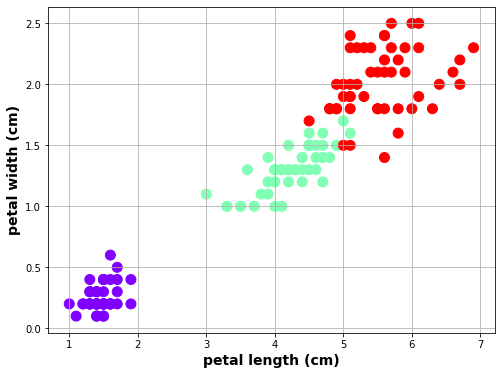

In [5]:
plt.figure(figsize=[8,6])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow,s = 100)
plt.xlabel(df.columns[0], fontsize = 14, fontweight = 'bold')
plt.ylabel(df.columns[1], fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

<br>

Veja que estamos diante de um problema de classificação: a partir do comprimento e largura das folhas, podemos classificar qual o tipo da flor, representado pelas classes 0, 1 e 2.

Vamos importar a __árvore de classificação__ do scikit-learn e estudá-la em detalhes:

<br>

In [6]:
#importando a árvore
from sklearn.tree import DecisionTreeClassifier

In [7]:
#instanciando o modelo
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=0)

#treinando o modelo
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<br>

Uma árvore de decisão é um modelo de machine learning cujo aprendizado é dado a partir de __segmentações sequenciais__ do conjunto de dados.

A partir de métodos matemáticos bem definidos, o algoritmo é capaz de entender quais variáveis devem ser consideradas nessa segmentação; além disso, qual a ordem das segmentações e quais os limiares.

Vamos, antes de entrar nos detalhes mais matemáticos, __entender visualmente uma árvore de decisão:__

<br>

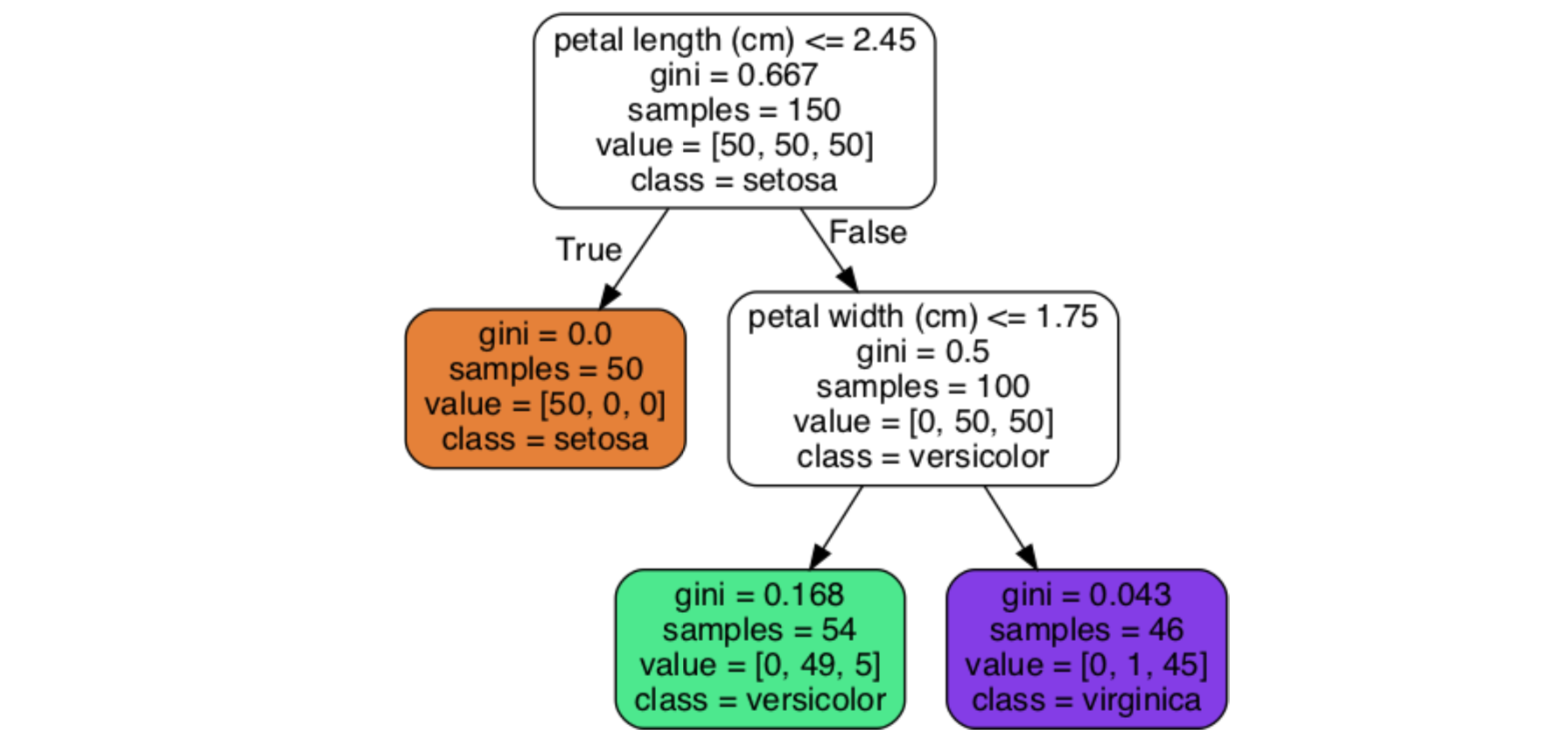

Vamos entender como a árvore representada na figura acima faz as predições. Suponha que você achou uma flor nova e quer classificá-la entre uma das três espécies do dataset iris.

Para a predição, você começa no __nó raiz__, no topo da árvore (profundidade zero). Este nó pergunta se a variável petal length é maior do que 2.45 ou não. Se sim (True), então vamos para o lado esquerdo, do contrário vamos para o lado direito. Caso a resposta seja sim, neste caso chegamos em uma __folha__, representando o final da árvore. Neste caso, a votação é pela classe setosa. Caso vamos para o lado direito (isto é, petal length > 2.45), então iremos analisar a variável petal width, que não é uma folha. Caso a variável petal width que estamos analisando seja menor ou igual a 1.75 iremos para o lado direito, chegando em um nó folha (profundidade 2) e a votação é pela classe versicolor. Caso contrário, iremos para o lado direito e a classe votada é a virgínica.

No exemplo acima, a árvore tinha __profundidade máxima 2__, o que pode ser visto na figura. Em casos gerais, poderíamos reparametrizar o algoritmo com outras profundidades maiores. Neste caso, veríamos mais ramificações da árvore, mas a essência do algoritmo seria a mesma.

Vejamos como seria a predição desta árvore no dataset:

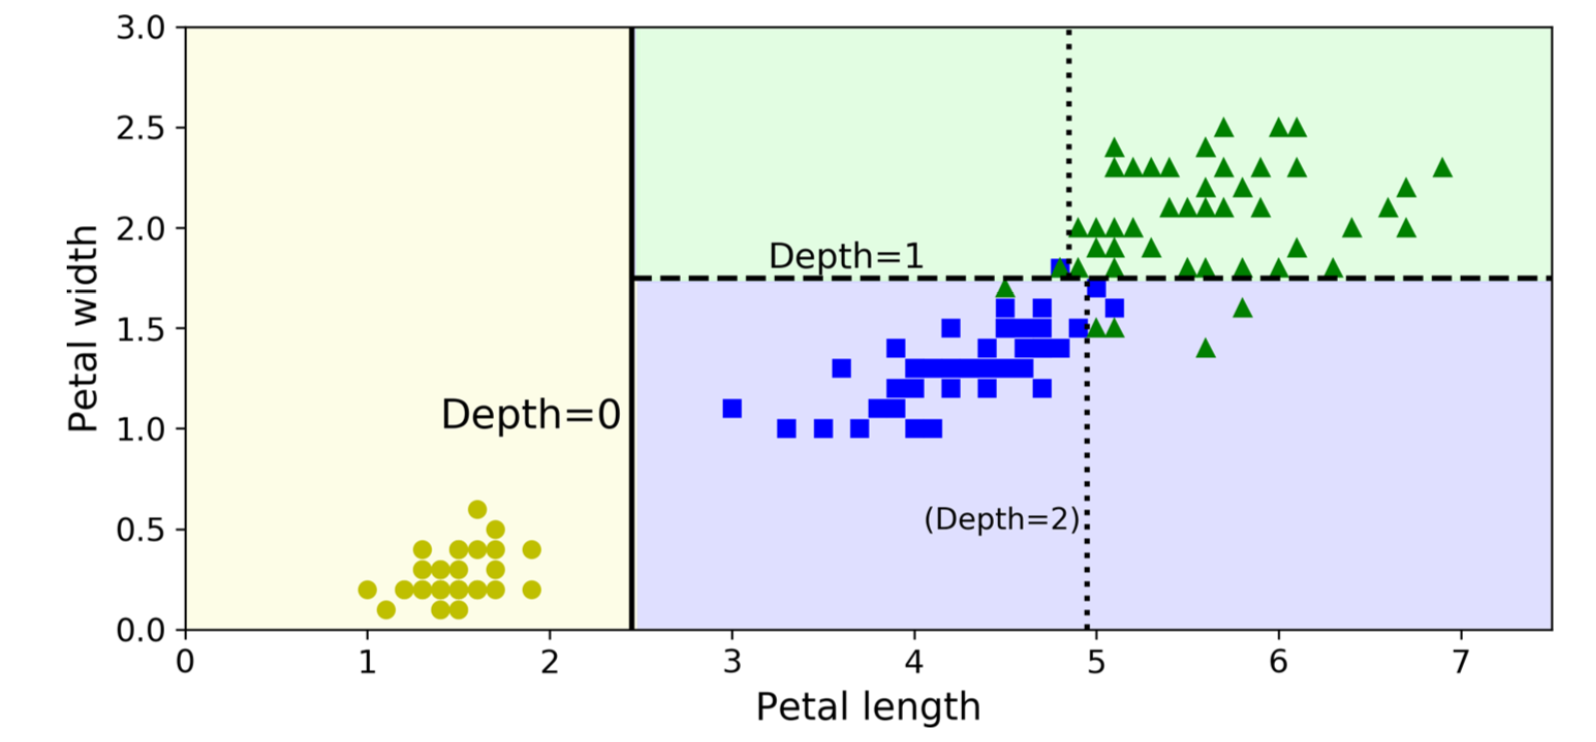

<br>

Árvores de decisão possuem algumas __vantagens em relação a outros algoritmos:__

    - Preprocessamento dos dados: precisa-se muito pouco, sem a necessidade de normalização dos dados;
        
    - Interpretabilidade das predições: a régra de predição acaba sendo uma sequência de "if-elses", o que facilita muito o entendimento e a interpretação do modelo.

Alguns parâmetros interessantes de se conhecer a respeito da árvores de decisão:
    
    - max_depth: profundidade máxima da árvore;
    
    - min_samples_split: número mínimo de amostra para que um split (uma segmentação) seja considerado;
    
    - min_samples_leaf: quantidade mínima de instâncias numa folha.
    
Veja em mais detalhes no link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

<br><br>

## Qual o método de aprendizado de uma árvore?

<br>

A partir da intuição visual acima, vamos discutir em mais detalhes o funcionamento de uma árvore.

Vamos focar a explicação para o contexto de classificação, mas a lógica para regressão é similar.

O algoritmo que discutiremos é o __CART (Classification and Regression Tree)__, que é a implementação de árvores no scikit-learn.

Considerando que temos um dataset de treinamento com variáveis preditoras $X_1, .., X_p$ e uma variável target $y$ para classificação - $y$ pode ser multiclasse.

O CART funciona dividindo o dataset em dois sub-datasets usando __uma variável__ $X_k$ e um __limiar__ $t_k$.
Por exemplo:

Se $X$ é todo o conjunto de variáveis, podemos definir:

-X1: sub-dataset de X, onde $X_k \leq t_k$;

-X2: sub-dataset de X, onde $X_k > t_k$;

A partir dessa divisão, podemos calcular __o custo__ associado:

$J(X_k, t_k) = m_{esquerda} / m \cdot G_{esquerda} + m_{direita} / m \cdot G_{direita}$.

Aqui $m$ é a quantidade de linhas - instâncias - do dataset $X$. Ainda, $m_{esquerda}$ é a quantidade de instâncias do $X_1$ e o $m_{direita}$ do $X_2$.

Finalmente, $G_{esquerda}$ e $G_{direita}$ são medidas de __impureza__ de cada sub-dataset, $X_1$ e $X_2$. Não vamos entrar em detalhes matemáticos, mas podemos entender que a impureza de um dataset está relacionada a __distribuicação da variável target__. Considere, por exemplo, que a variável target $y$ associada ao sub-dataset $X_1$ possui apenas uma categoria, então a impureza de $X_1$ é mínima. Caso $X_1$ tenha a variável target bastante balanceada entre as classes, teremos mais impureza. As medidas de impureza mais comuns neste contexto são __gini__ e __entropia__. Ao utilizarmos as árvores do scikit-learn, podemos parametrizar essa escolha, alterando o parâmetro: criterion ='gini', 'entropy'.

<br>

__Conclusão:__

Para o dataset inicial $X$, a variável $X_k$ e o limiar $t_k$, conseguimos calcular um custo $J(X_k, t_k)$.

O algoritmo __CART__ busca pelo par $(X_k, t_k)$ que __minimiza o custo__. 
Uma vez que a primeira divisão dos dados seja feita (isto é, divisão de $X$ para $X_1$ e $X_2$), então o algoritmo repete a lógica, mas dentro de cada sub-dataset. 

Os __critérios de parada__ mais comuns do algoritmo são:
    
__1- Max_depth (profundidade máxima da árvore):__ truncamos a árvore num tamanho máximo;

__2- Min_samples_leaf (quantidade mínima de folhas numa árvore):__ todos os nós folhas devem possuir uma quantidade mínima de instâncias de treinamento.

__3- Min_samples_split (quantidade mínima de instâncias para a divisão):__ o algoritmo só irá fazer a divisão dos dados caso o dataset a ser dividido contenha uma quantidade mínima de instâncias.


<br>

__Comentário final: Regressão__

A lógica de aprendizado do CART é similar quando o problema é de regressão. Essencialmente, a alteração é que a medida de impureza dos sub-datasets $G_{esquerda}$ e $G_{direita}$ é dada pelo __MSE__. Naturalmente, quanto menor o MSE, mais "pura" é a divisão.

<br><br>


__Estimando probabilidades das classes__ com árvores de decisão:

In [8]:
df.head()

petal length (cm)  petal width (cm)  flower flower_name
0                1.4               0.2     0.0      setosa
1                1.4               0.2     0.0      setosa
2                1.3               0.2     0.0      setosa
3                1.5               0.2     0.0      setosa
4                1.4               0.2     0.0      setosa

In [9]:
leaf_node_1 = df.loc[df['petal length (cm)'] <= 2.45]
leaf_node_2 = df.loc[(df['petal length (cm)'] > 2.45) & (df['petal width (cm)'] <= 1.75)]
leaf_node_3 = df.loc[(df['petal length (cm)'] > 2.45) & (df['petal width (cm)'] > 1.75)]

In [10]:
leaf_node_1.flower.value_counts()

0.0    50
Name: flower, dtype: int64

In [11]:
leaf_node_2.flower.value_counts()

1.0    49
2.0     5
Name: flower, dtype: int64

In [12]:
leaf_node_3.flower.value_counts()

2.0    45
1.0     1
Name: flower, dtype: int64

__Interpretação:__

Tivemos 50 instâncias no nó folha 1, todos da classe 0. Desta forma, visando estimar probabilidades, podemos interpretar que 100% das instâncias que forem preditas neste nó serão da classe 0.

A respeito do segundo nó, tivemos 54 instâncias neste caso. Dessas, 49 são da classe 1 e 5 são da classe 2. Desta forma, podemos interpretar que uma nova instância que cair neste nó terá 49/54 = 0.90740741 de probabilidade de ser da classe 1 e 5/54 = 0.09259259 de ser da classe 2.

Para o nó 3 a interpretação é a mesma. 

No caso geral de árvores com profundidades maiores (ou menores), a lógica é a mesma.

Podemos confirmar esses números a partir do método "predict_proba" que a árvore do sklearn possui:

In [13]:
tree_clf.predict_proba(X)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [14]:
leaf_node_1.flower.value_counts() / leaf_node_1.shape[0]

0.0    1.0
Name: flower, dtype: float64

In [15]:
leaf_node_2.flower.value_counts() / leaf_node_2.shape[0]

1.0    0.907407
2.0    0.092593
Name: flower, dtype: float64

In [16]:
leaf_node_3.flower.value_counts() / leaf_node_3.shape[0]

2.0    0.978261
1.0    0.021739
Name: flower, dtype: float64

<br><br>

## Regularização dos hiperparâmetros

<br>


As __árvores de decisão__, apesar de muito versáteis, interpretativas e fáceis de usar, __podem sofrer overfitting muito fácil.__ Desta forma, __é preciso controlar bem os hiperparâmetros__ das mesmas a fim de evitar este problema. 

Desta forma, ao controlarmos os hiperparâmetros das árvores, estamos regularizando-as, com o objetivo de minimizar o overfitting.

Vamos abaixo discutir um pouco a respeito.

In [17]:
from sklearn.datasets import make_moons, make_blobs

In [18]:
def geraDados(size = 500):
    #X, y = make_moons(size, noise = 0.2)
    X, y = make_blobs(n_samples = size, centers = [[0,0], [1,0], [0.5, 1]], cluster_std = 0.3)
    return X, y

In [19]:
X, y = geraDados()

X.shape, y.shape

((500, 2), (500,))

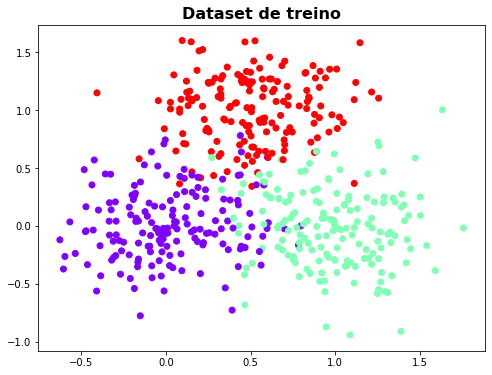

In [20]:
plt.figure(figsize=[8,6])
plt.title("Dataset de treino", fontsize = 16, fontweight = 'bold')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
plt.show()

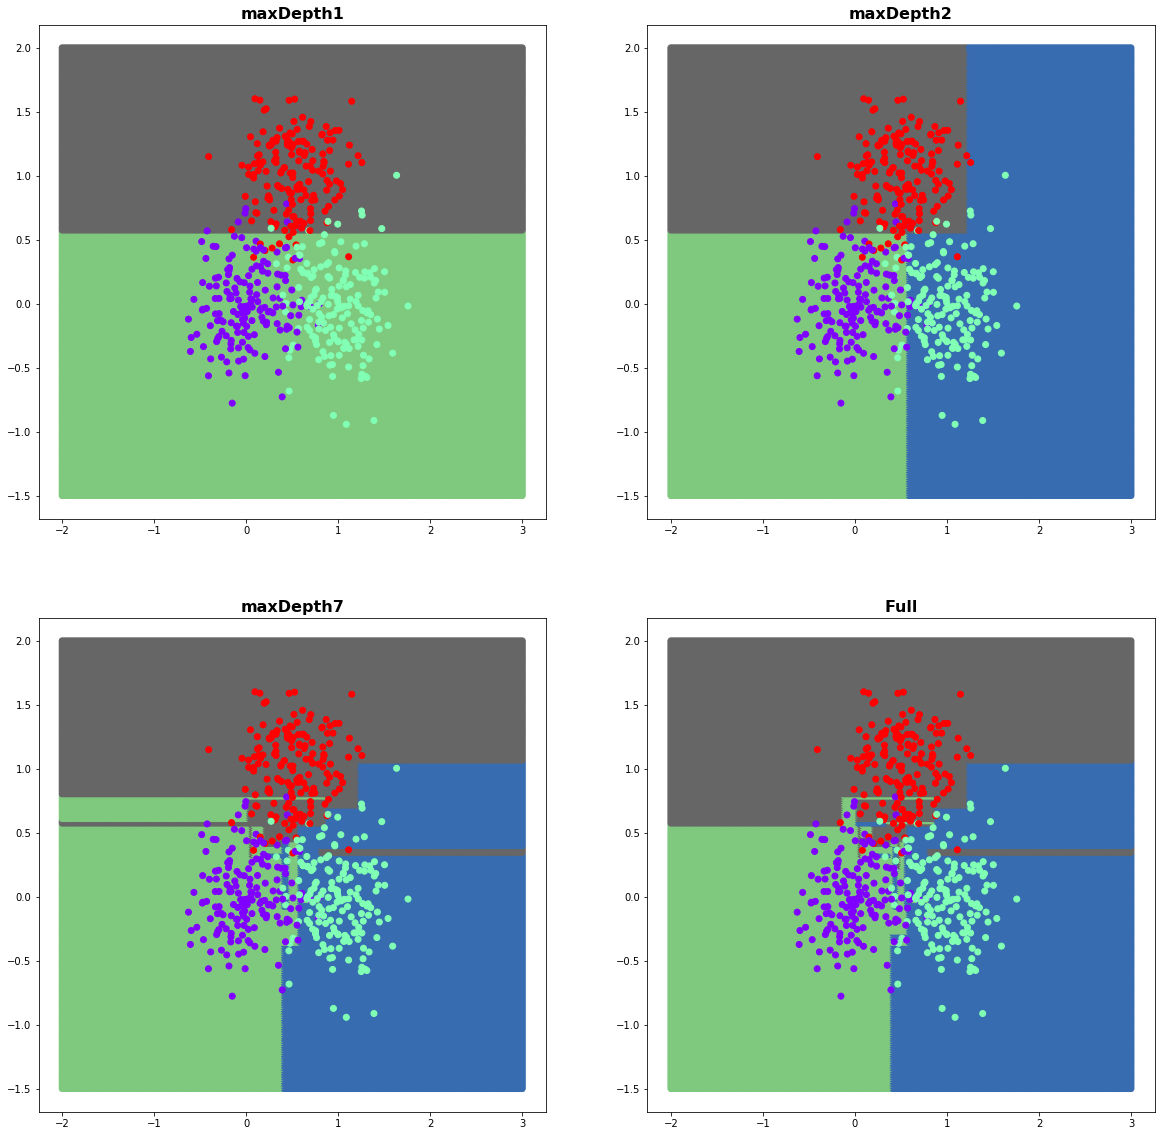

In [21]:
dt1 = DecisionTreeClassifier(max_depth = 1)
dt2 = DecisionTreeClassifier(max_depth = 2)
dt3 = DecisionTreeClassifier(max_depth = 7)
dt4 = DecisionTreeClassifier(max_depth = None)

models = [dt1, dt2, dt3, dt4]
nomes = ['maxDepth1', 
         'maxDepth2',
         'maxDepth7', 
         'Full']

plt.figure(figsize=[20,20])
for i in range(4):
    plt.subplot(2,2,i+1)
    model_i = models[i].fit(X, y)
    
    S = 200
    xx, yy = np.linspace(-2,3,S), np.linspace(-1.5,2,S)
    mesh = np.meshgrid(xx, yy)
    xx, yy = mesh
    xx = xx.ravel()
    yy = yy.ravel()
    mesh_X = np.c_[xx, yy]
    plt.scatter(xx, yy, c = model_i.predict(mesh_X), cmap = plt.cm.Accent)
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
    plt.title(nomes[i], fontsize = 16, fontweight = 'bold')
    
plt.show()

Acurácia em treino:

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
for i in range(4):
    model_i = models[i]
    print(nomes[i])
    print("acurácia: " + str(np.round(accuracy_score(y_true = y, y_pred = model_i.predict(X)),2)))
    print()

maxDepth1
acurácia: 0.63

maxDepth2
acurácia: 0.92

maxDepth7
acurácia: 0.98

Full
acurácia: 1.0



Vamos agora simular novos dados, dados de teste, para comparar os resultados:
    
<br>

In [24]:
Xsim, ysim = geraDados()

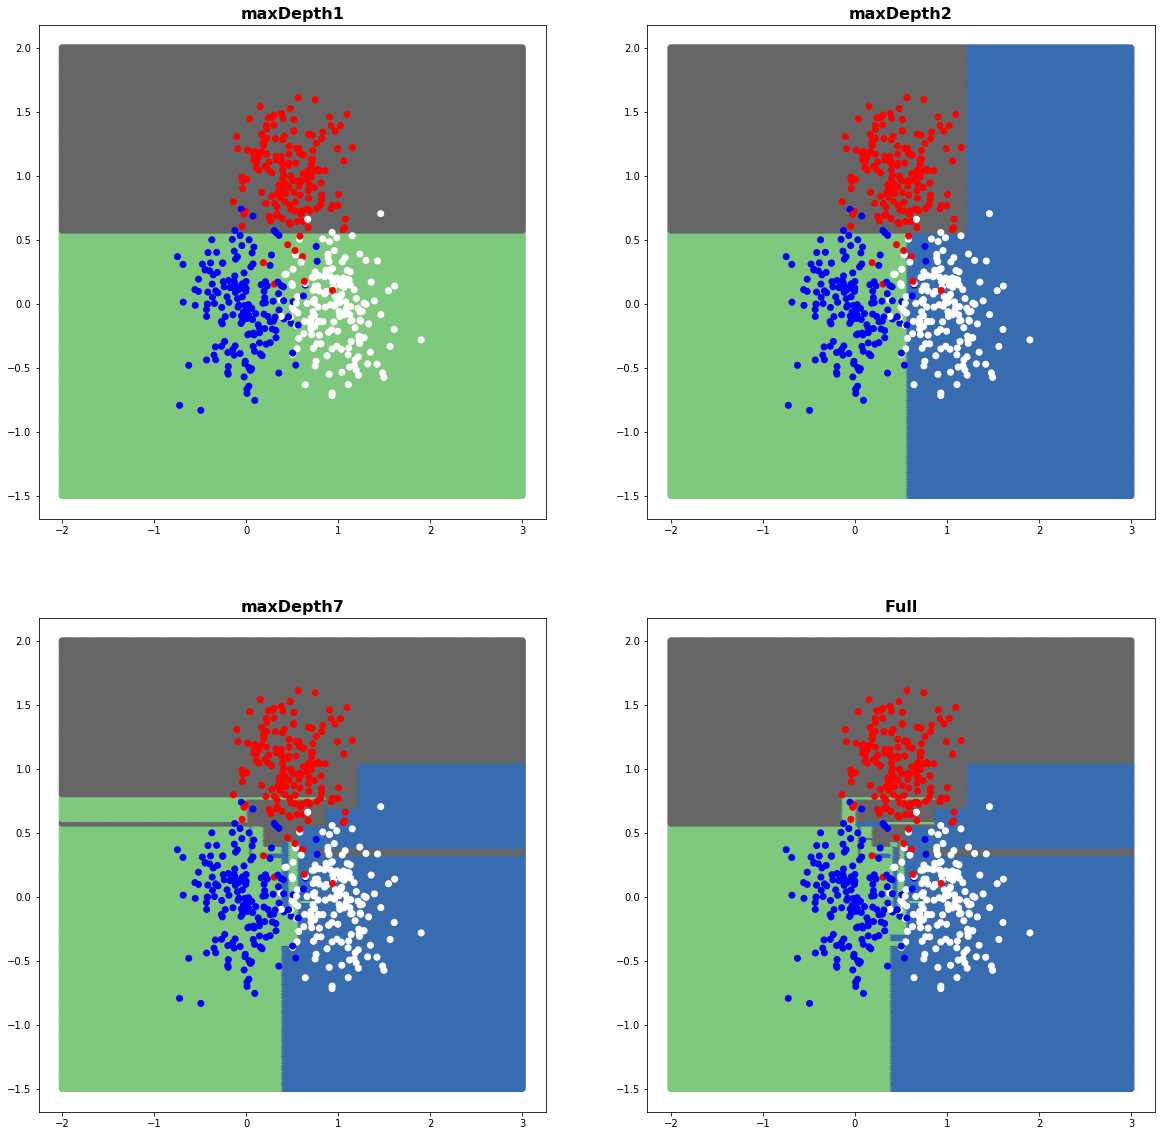

In [25]:
models = [dt1, dt2, dt3, dt4]
nomes = ['maxDepth1', 
         'maxDepth2',
         'maxDepth7', 
         'Full']

plt.figure(figsize=[20,20])
for i in range(4):
    plt.subplot(2,2,i+1)
    model_i = models[i]
    
    S = 200
    xx, yy = np.linspace(-2,3,S), np.linspace(-1.5,2,S)
    mesh = np.meshgrid(xx, yy)
    xx, yy = mesh
    xx = xx.ravel()
    yy = yy.ravel()
    mesh_X = np.c_[xx, yy]
    plt.scatter(xx, yy, c = model_i.predict(mesh_X), cmap = plt.cm.Accent)
    plt.scatter(Xsim[:, 0], Xsim[:, 1], c = ysim, cmap = plt.cm.bwr)
    plt.title(nomes[i], fontsize = 16, fontweight = 'bold')
    
plt.show()

In [26]:
for i in range(4):
    model_i = models[i]
    print(nomes[i])
    print("acurácia: " + str(np.round(accuracy_score(y_true = ysim, y_pred = model_i.predict(Xsim)),4)))
    print()

maxDepth1
acurácia: 0.642

maxDepth2
acurácia: 0.932

maxDepth7
acurácia: 0.904

Full
acurácia: 0.904



<br>

Vemos que, em dados simulados - dados de teste - a acurácia do modelo com profundidade máxima 2 foi superior aos outros modelos. 

Além disso, neste caso particular, também é possível observar visualmente que essa árvore (com max_depth = 2) obteve melhores resultados no quesito generalização, que é o principal objetivo no contexto de machine learning!

<br><br>

# Regressão

Árvores de decisão podem também ser aplicados no contexto de regressão. Considere o conjunto de dados abaixo:

         x1    target
0  0.374540 -0.005042
1  0.950714  0.835799
2  0.731994  0.244592
3  0.598658 -0.032501
4  0.156019  0.659870



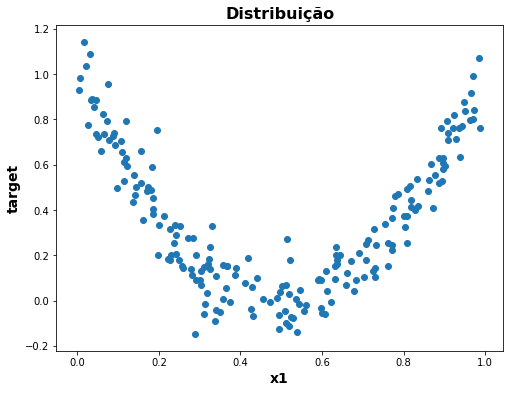

In [27]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

df = pd.DataFrame(np.c_[X, y], columns = ['x1', 'target'])
print(df.head())
print()

plt.figure(figsize=[8,6])
plt.scatter(df.x1, df.target)
plt.xlabel('x1', fontsize = 14, fontweight = 'bold')
plt.ylabel('target', fontsize = 14, fontweight = 'bold')
plt.title('Distribuição', fontsize = 16, fontweight = 'bold')
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

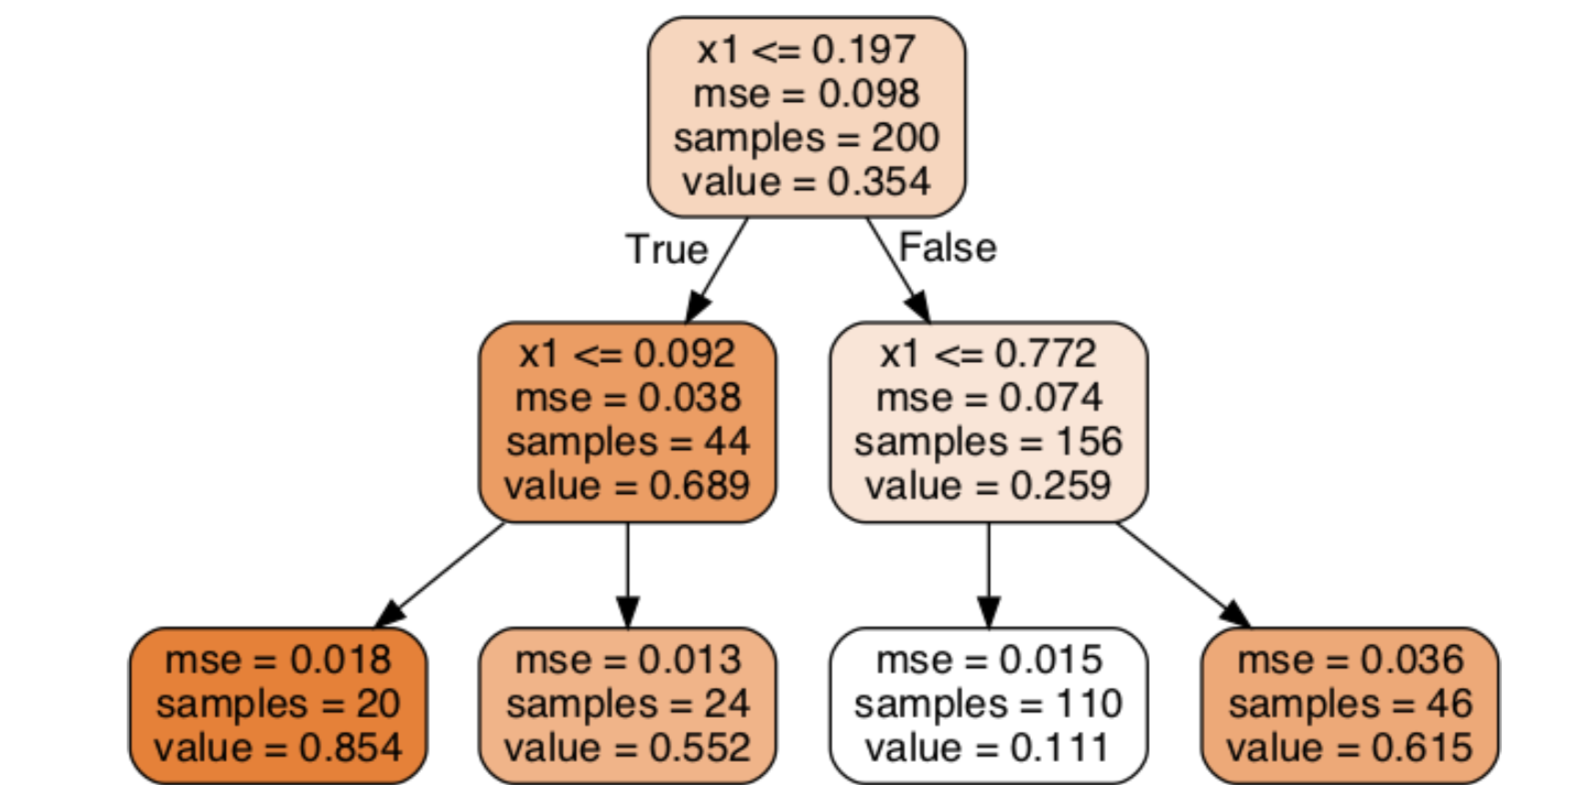

__A interpretação é muito similar no caso de classificação.__ 

Aqui, a principal diferença é que no final de cada nó - nós folha - __o resultado é um valor numérico.__

Ainda, o resultado final é dado pela __média da variável target dentro de cada nó.__ Podemos confirmar isso comparando os resultados abaixo com a figura da árvore:

In [29]:
df.loc[(df.x1 <= 0.197) & (df.x1 <= 0.092)].target.mean()

0.8538971465317925

In [30]:
df.loc[(df.x1 <= 0.197) & (df.x1 > 0.092)].target.mean()

0.5522399582417931

In [31]:
df.loc[(df.x1 > 0.197) & (df.x1 <= 0.772)].target.mean()

0.11063973365732517

In [32]:
df.loc[(df.x1 > 0.197) & (df.x1 > 0.772)].target.mean()

0.6146037890125187

<br>

Assim como no caso de árvores de classificação, o overfitting em árvores para regressão é também um problema muito comum. Desta forma, devemos trabalhar com regularização nos hiperparâmetros das mesmas, análogo ao que fizemos anteriormente!

Vejamos abaixo como podemos overfitar facilmente nossos dados de treino, caso não tomemos cuidados:

In [33]:
def fit_and_plot_dectree(X, y, tree):
    Xsorted = np.sort(X, axis = 0)
    tree.fit(X, y)
    plt.figure(figsize=[8,6])
    plt.scatter(X, y, c = 'blue', label = 'Dados Treino')
    plt.xlabel('x1', fontsize = 14, fontweight = 'bold')
    plt.ylabel('target', fontsize = 14, fontweight = 'bold')
    plt.title('Distribuição', fontsize = 16, fontweight = 'bold')
    plt.plot(Xsorted, tree.predict(Xsorted), c = 'red', lw = 3, label = 'Predições')
    plt.legend()
    plt.show()

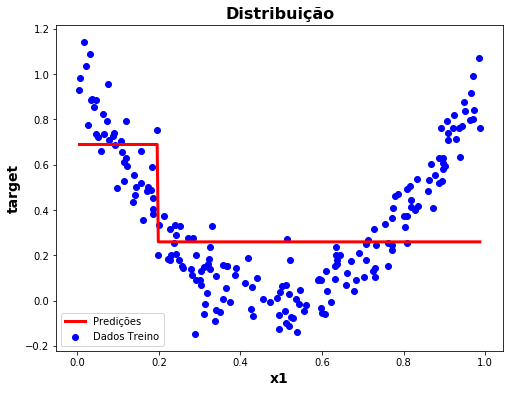

In [34]:
fit_and_plot_dectree(X, y, tree = DecisionTreeRegressor(max_depth = 1) )

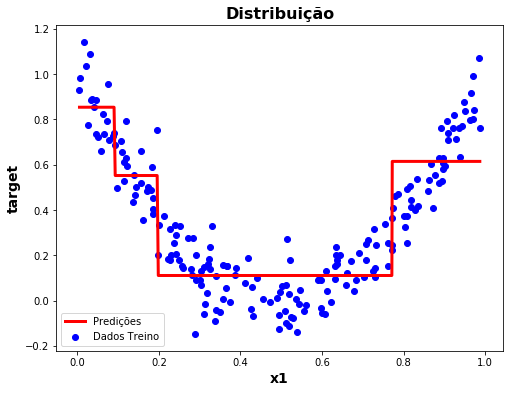

In [35]:
fit_and_plot_dectree(X, y, tree = DecisionTreeRegressor(max_depth = 2) )

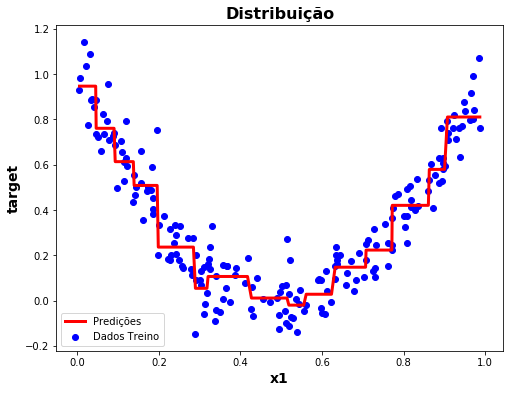

In [36]:
fit_and_plot_dectree(X, y, tree = DecisionTreeRegressor(min_samples_leaf = 10) )

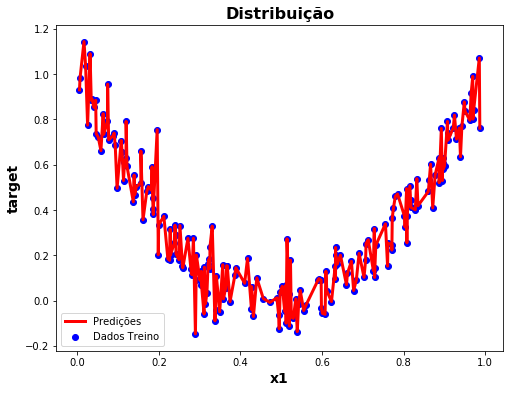

In [37]:
fit_and_plot_dectree(X, y, tree = DecisionTreeRegressor(max_depth = None) )

<br>

Vemos que, no último gráfico, a árvore de regressão "fitou completamente" os dados de treino, muito provavelmente overfitando os resultados. Precisamos controlar os parâmetros da árvore para evitar esse comportamento!

<br><br>

<br><br>


# Modelos Ensemble

<br>

Existe uma frase famosa, muito aplicada em vários contextos: "wisdom of the crowd", em português seria __"sabedoria da multidão"__. Essencialmente, a ideia é que a __opinião coletiva__ pode ser mais valiosa do que a opinião de um expert. Essa é a essência dos algoritmos ensemble! Inclusive, "ensemble" significa "conjunto", ou "coletivo".

Vamos discutir alguns métodos ensemble ao longo do texto. Discutiremos os modelos: __voting, bagging e boosting.__


## Voting

Considere o contexto de classificação (mas também podemos usar esses algoritmos para regressão). Suponha que você tenha treinado alguns classificadores, como uma regressão logística, alguns KNN's (variando a quantidade de vizinhos), etc. Um jeito fácil de eventualmente melhorar a performance seria __agrupá-los__ e a predição final ser dada pela __classe majoritária dentro da votação!__ No caso de regressão, bastaria tomar a __média das predições.__

Considere a figura abaixo:

<br>

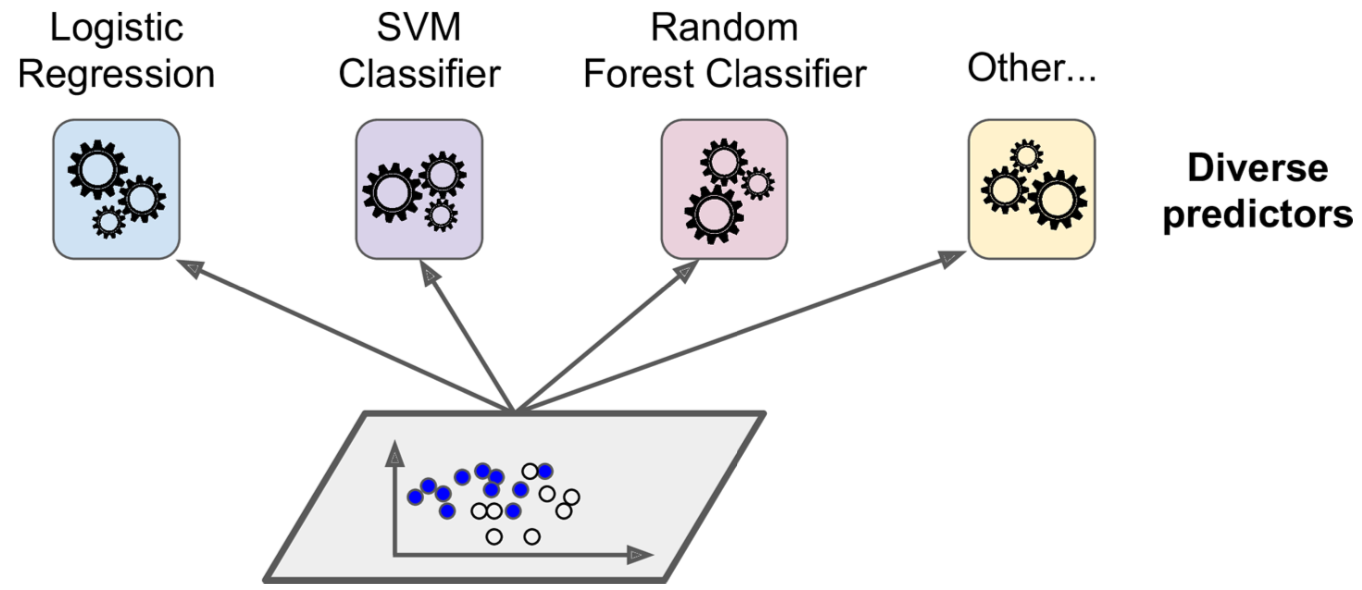

<br>

Tendo treinado vários modelos, como um __ensemble do tipo voting__ irá fazer as predições?

<br>

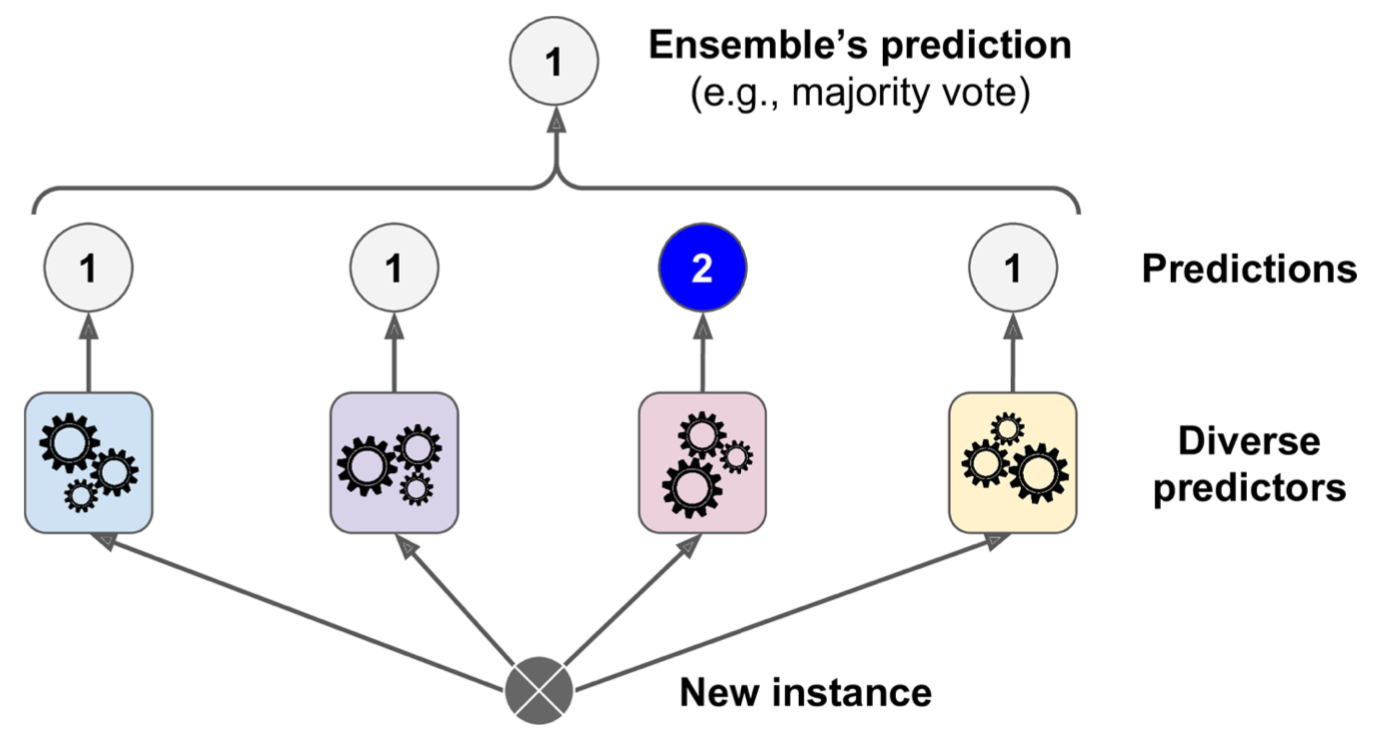

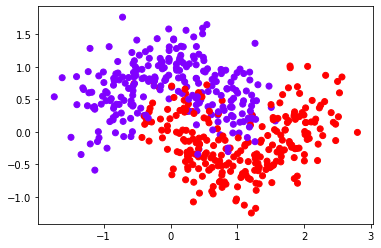

In [38]:
#importando dados - classificação binária
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.rainbow)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [41]:
#instanciando os modelos
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

#treinando os modelos
logreg.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
estimators = [('lr', logreg), ('knn', knn), ('dt', dt)]

for est in estimators:
    model_name = est[0]
    model = est[1]
    acuracia = accuracy_score(y_true = ytest, y_pred = model.predict(Xtest))
    print(model_name, " | acurácia: ", acuracia)

lr  | acurácia:  0.864
knn  | acurácia:  0.912
dt  | acurácia:  0.872


In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
voting = VotingClassifier(estimators = estimators)
voting.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

In [45]:
accuracy_score(y_true = ytest, y_pred = voting.predict(Xtest))

0.928

Conseguimos uma acurácia um pouco maior!

Claro que não é necessário que algoritmos do tipo ensemble performem sempre melhor, mas é muito comum isso acontecer.

Vamos na sequência discutir a próxima classe de ensembles.

<br>

## Bagging

Um jeito de usar combinações de algoritmos é via voting, como vimos anteriormente. Um outro jeito seria usar __o mesmo algoritmo base__, mas treinando-o em __diferentes subconjuntos do dataset de treino!__ Essa é a essência dos ensembles do tipo bagging.

O nome __bagging__ significa __bootstrap aggregating,__ ou seja, agregação por bootstrap. O termo __bootstrap__ é muito usado no contexto de estatística; para nós refere-se apenas a: __amostragem feita com reposição.__

A figura abaixo ilustra a amostragem com reposição:

<br>

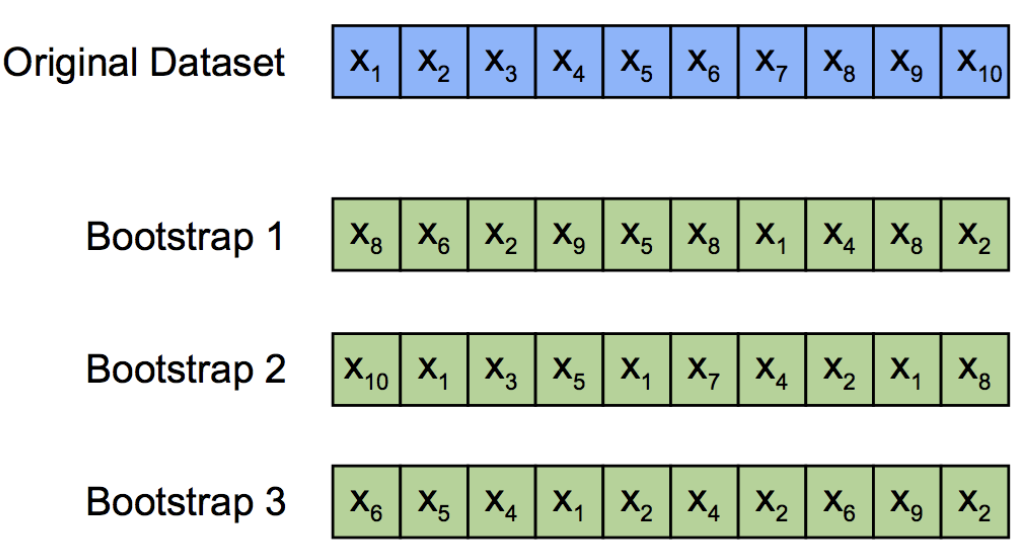

O dataset original contém 10 instâncias, de $x_1$ até $x_{10}$. A amostragem com reposição - __boostrap__ - consiste de, aleatoriamente, gerarmos outro dataset de mesmo tamanho - 10 neste caso - a partir do dataset original. Desta forma cada instância tem a mesma chance de ser escolhida - 10% neste caso - e podemos escolher instâncias repetidas!

Como podemos ver, o primeiro dataset gerado - bootstrap 1 - contém repetições das instâncias $x_2$ e $x_8$. 


<br><br>

Algoritmos __bagging__ funcionam com a seguinte lógica:

    1- Fixe um algoritmo base - por exemplo, uma árvore de decisão;
    2- Fixe B: quantidade de algoritmos (estimadores) a ser usado;
    3- Crie B datasets bootstrap e treine o algoritmo base em cada um deles;
    3- Use os B estimadores treinados para fazer predições:
        -3.1 Classificação: usamos o voto majoritário das predições;
        -3.2 Regressão: usamos a média das predições.
        
        
        
<br><br>

        
Provavelmente o algoritmo __bagging__ mais famoso e usado é o __Random Forest.__ Esse algoritmo é muito poderoso, geralmente sendo superior a vários outros algoritmos; aplicado tanto para classificação quanto para regressão.

No caso do Random Forest, os algoritmos bases são as árvores de decisão.

Além de utilizar bootstrap para escolher as amostras para cada árvore, o random forest tem um fator aleatório a mais:

em cada divisão que uma árvore faz, __apenas algumas das variáveis explicativas são consideradas!__ A escolha dessas variáveis é aleatória e muda em cada divisão. 

Dessa forma, o algoritmo tenta minimizar a dependência a respeito de uma única variável, tornando-o muito poderoso em fazer predições.

No scikit-learn, o parâmetro "max_features" controla essa quantidade de variáveis disponíveis em cada divisão das árvores. Vejamos abaixo como utilizá-lo:

In [46]:
#carregando um dataset para regressão

from sklearn.datasets import load_diabetes
X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor

O Random Forest, sendo um conjunto de árvores, __compartilha vários hiperparâmetros idênticos aos das árvores, como profundidade máxima, quantidade mínima de instâncias nas folhas, etc.

Além disso, 


__n_estimators:__ número de árvores 


__max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split:__

    If int, then consider max_features features at each split.

    If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

    If “auto”, then max_features=sqrt(n_features).

    If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

    If “log2”, then max_features=log2(n_features).

    If None, then max_features=n_features.

In [48]:
bg = RandomForestRegressor(n_estimators = 1000, 
                           max_depth = 5, 
                           min_samples_leaf = 10, 
                           max_features = 'auto')
bg.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
#R2
from sklearn.metrics import r2_score

In [50]:
r2_score(y_true = ytest, y_pred = bg.predict(Xtest))

0.5044877301846044

<br>

Podemos acessar cada uma das árvores treinadas no random forest:

In [51]:
bg.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1089556652, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48763532, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decre

<br>

Abaixo, vamos analisar o __histograma do R2 para cada árvore treinada no random forest:__

<br>

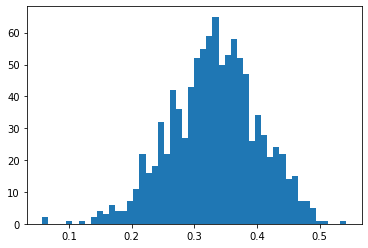

In [52]:
L=[]
for e in bg.estimators_:
    r2_est = r2_score(y_true = ytest, y_pred = e.predict(Xtest))
    L.append(r2_est)
    
plt.hist(L, bins = 50)
plt.show()

<br>

Nitidamente, temos uma __alta variância__ do R2. Além disso, veja que __praticamente todos os valores de R2 das árvores foram menores do que o valor de R2 que o random forest obteve.__

Fica evidente a superioridade do algoritmo neste conjunto de dados!

<br>

## Boosting


Modelos do tipo __boosting__ são também __ensembles__ de algoritmos base, mas possuem uma lógica diferente dos modelos do tipo bagging. Vamos, em nossa discussão, comentar sobre boostings de árvores de decisão, mas esses modelos podem ser usados em contextos mais gerais.

Lembre-se que Bagging consiste de recriarmos o dataset de treino em vários conjuntos bootstrap e treinar árvores - ou modelos base - nesses conjuntos, com a finalidade de agrupá-los no final. Desta forma, __no contexto de Bagging - incluindo Random Forest - as árvores de decisão são independentes entre si! Em modelos do tipo boosting, a ideia é treinar as árvores de forma sequencial:__ cada árvore é treinada a partir de informação prévia da árvore anterior. Desta forma, a primeira árvore do treinamento não possui muita informação e seu nível de erro de predição será alto. Já a segunda árvore será treinada tendo informação dos resultados da primeira árvore, levando a um erro um pouco menor. A terceira árvore será treinada tendo informação das duas primeiras árvores e assim por diante.


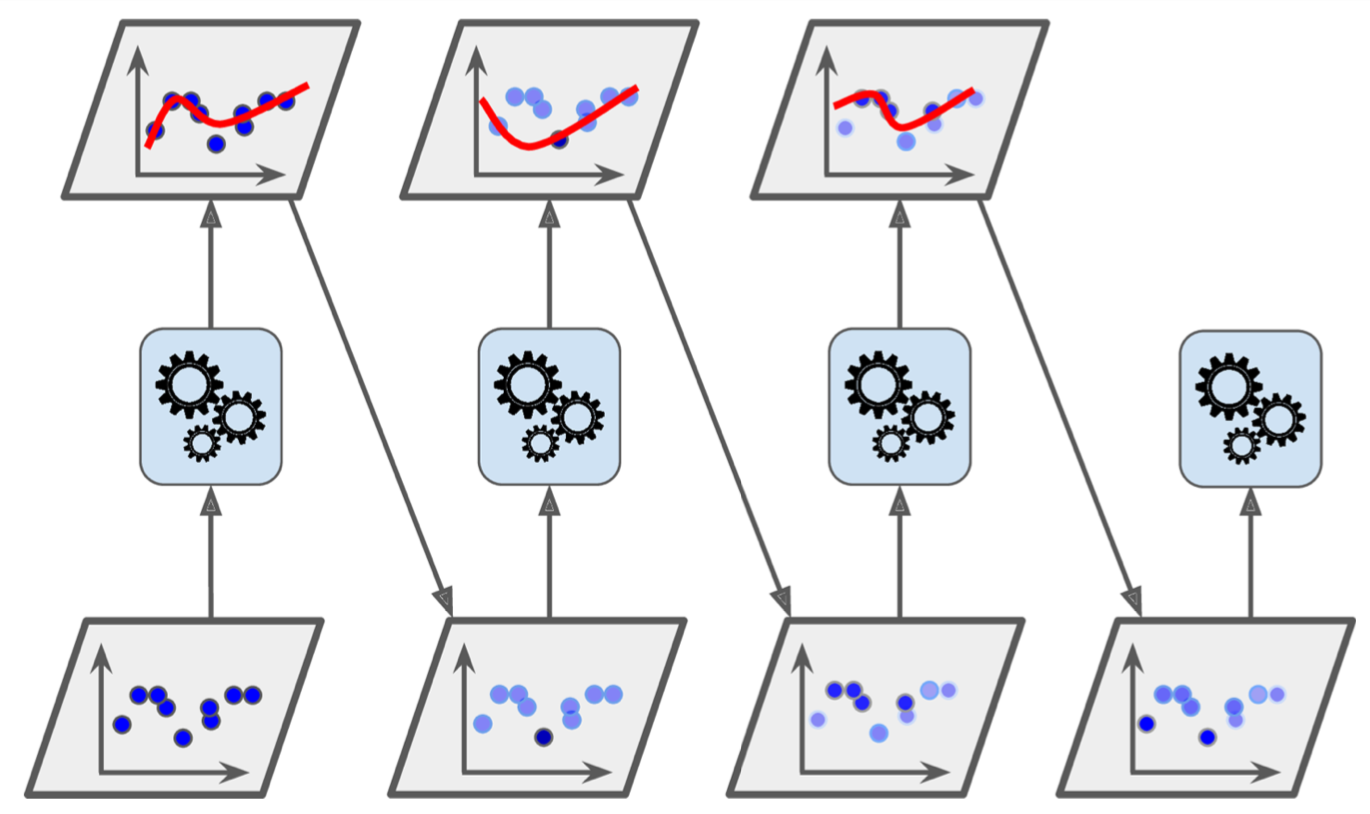

Para exemplificar melhor, vamos apresentar o modelo no contexto de regressão. Algoritmos do tipo boosting tendem a __aprender lentamente com as iterações__, isso será controlado por um parâmetro similar ao learning rate já discutido em outros contextos. Além disso, cada árvore nessa sequência é treinada nos resíduos do modelo anterior. Isto é, em vez de usarmos a variável target Y original, iremos treinar essa sequência de árvores com targets distintos, precisamente os resíduos do modelo anterior.

Abaixo apresentamos uma classe python com o algoritmo implementado.

Veja que, para iniciar o algoritmo, setamos o número de passos que serão dados - qtd. de árvores treinadas em sequência -; além disso, fixamos também o parâmetro $\gamma$, que controla a taxa de aprendizagem do algoritmo.

No método fit da classe, a primeira árvore de decisão é treinada com a variável target Y original. Na sequência, calculamos o resíduo, essencialmente a diferença entre os valores reais e a predição feita, ajustada pela taxa de aprendizagem. Desta forma, as próximas árvores serão treinadas nesses resíduos.

Finalmente, todas as árvores treinadas em sequência são salvas e usadas no médoto predict, onde a predição final consiste da soma de todas as predições, ajustadas pela taxa de aprendizagem.

In [53]:
class BoostingRegressor():
    
    def __init__(self, num_steps, gamma, max_depth):
        self.num_steps = num_steps
        self.gamma = gamma
        self.max_depth = max_depth
    
    def fit(self, X, y):
        dic__ = {}
        for b in range(self.num_steps):
            if b == 0:
                resid = y
            dt_b = DecisionTreeRegressor(max_depth=self.max_depth).fit(X, resid)

            resid = resid - self.gamma * dt_b.predict(X)
            dic__[b] = dt_b
        self.dic__ = dic__
        
    def predict(self, X):
        dic = self.dic__
        pred = None
        for b in range(self.num_steps):
            if b  == 0:
                pred = (self.gamma * dic[b].predict(X))
            pred += (self.gamma * dic[b].predict(X))
        return pred

Na prática, iremos usar as classes __AdaBoosting__ e __GradientBoosting__ implementadas no scikit-learn!

São usados de forma similar aos outros algoritmos já discutidos!

Links documentação:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

In [54]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

<br>

Ao concluirmos este módulo, discutimos bastante sobre modelos de árvores e ensembles de árvores.

Vimos que são modelos poderosos mas que precisamos tomar bastante cuidado para não overfitarmos os dados.

Um jeito de regularizar esses modelos - na tentativa de minimizar o overfitting - é ajustando os hiperparâmetros dos modelos.

Neste caso, existem muitos parâmetros que podem ser ajustados, por exemplo:


(para árvores) max_depth, min_samples_leaf, min_samples_split, criterion;

(para ensembles) n_estimators, max_features, learning_rate;


<br>

Uma __metodologia__ para __testar várias combinações de hiperparâmetros__ e __escolher__ a que __melhor__ se adequa aos dados em questão é conhecida por __Grid Search.__ 

Nos exercícios, discutiremos em mais detalhes sobre como utilizar o grid search para nos ajudar nesse ponto!

<br>